In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn import cross_validation
%matplotlib inline

In [9]:
df = pd.read_pickle("../train.pkl")

In [10]:
df = df[~((df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000))]

## Creating Function to Save .csv for Predicted Models

In [11]:
def predict_tocsv(yhat_test):
    predicted = pd.DataFrame({"Id": np.arange(1461,2920), "SalePrice": yhat_test})
    return predicted.to_csv("./predicted.csv", index=False)

## Create Random Forest Model

In [12]:
X = df.drop('SalePrice',axis=1)
y = df.SalePrice

rf = RandomForestRegressor(n_estimators = 1000, max_features=20, oob_score=True)

Fitting Model and Proxy Cross Validation (eg, OOB Score)

In [13]:
rf.fit(X,y)
rf.oob_score_

0.8739151096001317

## Creating new dataframe with noise columns

In [10]:
df.shape

(1460, 328)

In [11]:
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

In [14]:
df = pd.read_pickle("../train.pkl")
df = df[~((df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000))]

X_1 = df.drop("SalePrice", axis=1)
X_1["Random_Noise"] = np.random.random(size=len(X_1))
y_1 = df.SalePrice
rf = RandomForestRegressor(n_estimators = 1000, max_features=20, oob_score=True)
rf.fit(X_1, y_1)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=20, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [15]:
importance = pd.DataFrame(rf.feature_importances_, index=X_1.columns).sort_values(0,ascending=False)
importance = importance.reset_index()
importance.iloc[0:32]

,index,0
0,GrLivArea,0.073948
1,TotalBsmtSF,0.063499
2,1stFlrSF,0.054330
3,GarageCars_3.0,0.051526
4,GarageArea,0.051082
5,YearBuilt,0.046980
6,BsmtQual_Ex,0.033968
7,BsmtFinSF1,0.033156
8,YearRemodAdd,0.030717
9,2ndFlrSF,0.028605


In [16]:
rf.fit(X_1, y_1)
rf.oob_score_

0.87142123933111

<b>Random Forest with Random Grid Search </b>

In [170]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

#Instantiate Random Forest
randomForest = RandomForestRegressor()

#Parameters for grid of random forest
randgrid_para_forest = {
    "n_estimators": np.linspace(start=100, stop=1000, num=10, dtype=int),
    "criterion": ["mae", "mse"],
    "min_samples_leaf": np.linspace(2,50, 5, dtype=int),
    "min_samples_split": np.linspace(start=2, stop=30, num=5, dtype=int),
    "random_state": [42]}
    
randgrid_search_forest = RandomizedSearchCV(randomForest, randgrid_para_forest, cv=5, n_jobs=-1, verbose=5)

In [171]:
randgrid_search_forest.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 26.4min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000]), 'criterion': ['mae', 'mse'], 'min_samples_leaf': array([ 2, 14, 26, 38, 50]), 'min_samples_split': array([ 2,  9, 16, 23, 30]), 'random_state': [42]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=5)

In [174]:
randgrid_search_forest.best_params_

{'criterion': 'mse',
 'min_samples_leaf': 14,
 'min_samples_split': 2,
 'n_estimators': 800,
 'random_state': 42}

In [183]:
X_test = pd.read_pickle("../test.pkl")

In [191]:
pred_Saleprice = randgrid_search_forest.predict(X_test)

predict_tocsv(pred_Saleprice)

## Testing Lasso

(array([  5.,  12.,  54., 184., 469., 399., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <a list of 10 Patch objects>)

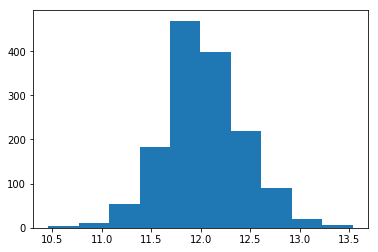

In [19]:
#Normalizing SalePrice column
y_log = np.log(y)
plt.hist(y_log)

In [20]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(X)
X_std = scale.transform(X)
lasso = LassoCV(alphas = [1, 0.1, 0.01, 0.001, 0.0005], selection='random', max_iter=15000)
lasso.fit(X_std, y_log)

LassoCV(alphas=[1, 0.1, 0.01, 0.001, 0.0005], copy_X=True, cv=None, eps=0.001,
    fit_intercept=True, max_iter=15000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='random', tol=0.0001, verbose=False)

In [21]:
#Best alpha
lasso.alpha_

0.001

<b>Significant variables from Lasso</b>

In [19]:
lasso_coefs = pd.DataFrame(X.columns, lasso.coef_)
lasso_coefs.loc[lasso_coefs.index!=0,]

,0
0.048737,YearBuilt
0.018371,YearRemodAdd
-0.000818,YrSold
0.000792,LotFrontage
0.022344,LotArea
0.002990,MasVnrArea
0.028163,BsmtFinSF1
0.005273,BsmtFinSF2
0.038823,TotalBsmtSF
0.128732,GrLivArea


In [20]:
sum(lasso_coefs.index!=0)

241

In [22]:
#Training Accuracy
lasso.score(X_std,y_log)

0.9509677794777004

<b>Grid Search Lasso</b>

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso = Lasso()
alphas = np.logspace(-5, 4, 200)
grid = GridSearchCV(estimator=lasso,
param_grid=dict(alpha=alphas), cv=10, n_jobs=-1, scoring='r2')

In [26]:
grid.fit(X_std, y_log)

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': array([1.00000e-05, 1.10975e-05, ..., 9.01102e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [37]:
print(grid.score(X_std,y_log))
print(grid.best_score_)
print(grid.best_params_)

0.9458456172507602
0.9199966070813933
{'alpha': 0.002247805833548725}


<b>Predicting Lasso</b>

In [39]:
from sklearn.preprocessing import StandardScaler

test = pd.read_pickle("../test.pkl")
X_test = test

#standardizing x variables
scale = StandardScaler()
scale.fit(X_test)
X_test_std = scale.transform(X_test)

#predicting test variables and taking the exp() of the response to reverse log transformation
pred_test = grid.predict(X_test_std)
pred_Saleprice = np.exp(pred_test)

#saving predicted as csv to submit on kaggle
predict_tocsv(pred_Saleprice)

## Checking Residuals

In [ ]:
!type('')

In [129]:
residuals_log = (y_log - lasso.predict(X_std))
residuals_log

0       0.021807
1      -0.034656
2       0.035510
3      -0.214010
4      -0.142429
5      -0.007793
6       0.111094
7      -0.038174
8       0.016915
9      -0.064857
10      0.006769
11     -0.028675
12      0.090127
13      0.226361
14      0.081408
15     -0.017836
16     -0.020762
17     -0.187270
18      0.047903
19      0.092560
20     -0.006813
21      0.092814
22      0.010919
23     -0.020653
24     -0.005661
25      0.022878
26      0.003632
27      0.067446
28      0.048782
29     -0.090314
30     -0.447946
31      0.043686
32     -0.047544
33     -0.074875
34     -0.061860
35      0.029534
36     -0.088387
37     -0.017924
38     -0.165840
39      0.026881
40      0.136792
41      0.042314
42     -0.032245
43      0.030117
44     -0.016699
45      0.051796
46     -0.044276
47      0.022500
48      0.067571
49     -0.050794
50      0.016593
51     -0.085529
52     -0.000397
53     -0.000427
54      0.007304
55      0.058347
56     -0.118779
57      0.018707
58     -0.0429

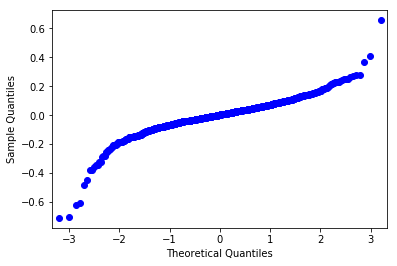

In [130]:
import statsmodels.api as sm

fig = sm.qqplot(residuals_log)
plt.show()

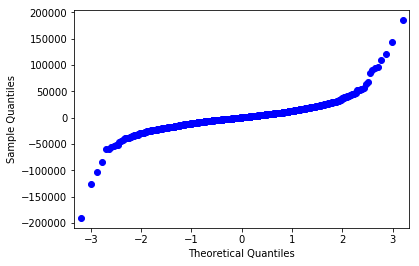

In [133]:
#residuals of un-logged original y-variable minus predicted y-variable
residuals = (y - np.exp(lasso.predict(X_std)))

fig = sm.qqplot(residuals)
plt.show()

## Adding Fed Funds Data

In [65]:
dict_range = {
 (2005, 12): 4.25,
 (2006, 1): 4.25,
 (2006, 2): 4.5,
 (2006, 3): 4.5,
 (2006, 4): 4.75,
 (2006, 5): 5,
 (2006, 6): 5,
 (2006, 7): 5.25,
 (2006, 8): 5.25,
 (2006, 9): 5.25,
 (2006, 10): 5.25,
 (2006, 11): 5.25,
 (2006, 12): 4.25,
 (2007, 1): 4.25,
 (2007, 2): 4.25,
 (2007, 3): 4.25,
 (2007, 4): 4.25,
 (2007, 5): 4.25,
 (2007, 6): 4.25,
 (2007, 7): 4.25,
 (2007, 8): 4.25,
 (2007, 9): 4.25,
 (2007, 10): 4.75,
 (2007, 11): 4.50,
 (2007, 12): 4.25,
 (2008, 1): 3,
 (2008, 2): 3,
 (2008, 3): 2.25,
 (2008, 4): 2.25,
 (2008, 5): 2,
 (2008, 6): 2,
 (2008, 7): 2,
 (2008, 8): 2,
 (2008, 9): 2,
 (2008, 10): 1.5,
 (2008, 11): 1,
 (2008, 12): 1,
 (2009, 1): 0,
 (2009, 2): 0,
 (2009, 3): 0,
 (2009, 4): 0,
 (2009, 5): 0,
 (2009, 6): 0,
 (2009, 7): 0,
 (2009, 8): 0,
 (2009, 9): 0,
 (2009, 10): 0,
 (2009, 11): 0,
 (2009, 12): 0,
 (2010, 1): 0,
 (2010, 2): 0,
 (2010, 3): 0,
 (2010, 4): 0,
 (2010, 5): 0,
 (2010, 6): 0,
 (2010, 7): 0,
 (2010, 8): 0,
 (2010, 9): 0,
 (2010, 10): 0,
 (2010, 11): 0,
 (2010, 12): 0,
 (2011, 1): 0,
 (2011, 2): 0,
 (2011, 3): 0,
 (2011, 4): 0,
 (2011, 5): 0,
 (2011, 6): 0,
 (2011, 7): 0,
 (2011, 8): 0,
 (2011, 9): 0,
 (2011, 10): 0,
 (2011, 11): 0,
 (2011, 12): 0,
 (2012, 1): 0,
 (2012, 2): 0,
 (2012, 3): 0,
 (2012, 4): 0,
 (2012, 5): 0,
 (2012, 6): 0,
 (2012, 7): 0,
 (2012, 8): 0,
 (2012, 9): 0,
 (2012, 10): 0,
 (2012, 11): 0,
 (2012, 12): 0}

In [93]:
df = pd.read_csv("../data/train.csv")

#creating temp df to add FedFunds based on prior dictionary and MoSold and YrSold
temp= df[['MoSold',"YrSold"]]
temp["FedFunds"] = pd.Series(np.ones(len(temp)))
temp["FedFunds"] = temp.apply(lambda x: dict_range[(int(x[1]), int(x[0]))], axis=1)
temp["Yr_Mo"] = temp.apply(lambda x: str(int(x[1]))+"/"+str(int(x[0])), axis=1)

df = temp.merge(df, on=["MoSold","YrSold"])
df.tail()

C:\Users\rl80914n\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\rl80914n\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\rl80914n\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

,MoSold,YrSold,FedFunds,Yr_Mo,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice
51923,9,2007,4.25,2007/9,629,60,RL,70.0,11606,Pave,NaN,IR1,HLS,AllPub,Inside,Sev,NAmes,Norm,Norm,1Fam,2Story,5,5,1969,1969,Gable,CompShg,Plywood,Plywood,BrkFace,192.0,TA,TA,PConc,Gd,TA,Av,Rec,650,Unf,0,390,1040,GasA,TA,Y,SBrkr,1040,1040,0,2080,0,1,1,2,5,1,Fa,9,Typ,2,TA,Attchd,1969.0,Unf,2,504,TA,TA,Y,335,0,0,0,0,0,NaN,NaN,NaN,0,WD,Family,135000
51924,9,2007,4.25,2007/9,686,160,RL,NaN,5062,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,2Story,7,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,828,LwQ,182,180,1190,GasA,Gd,Y,SBrkr,1190,900,0,2090,1,0,2,0,3,1,Gd,6,Min1,1,TA,Attchd,1984.0,Fin,2,577,TA,TA,Y,219,0,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,207500
51925,9,2007,4.25,2007/9,1063,190,RM,85.0,13600,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,5,5,1900,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,662,662,GasA,TA,N,SBrkr,1422,915,0,2337,0,0,2,0,5,2,TA,10,Min2,0,NaN,Detchd,1945.0,Unf,2,560,TA,TA,Y,0,57,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,90000
51926,9,2007,4.25,2007/9,1083,20,RL,70.0,8749,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,100.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1459,1459,GasA,Ex,Y,SBrkr,1459,0,0,1459,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2002.0,RFn,2,527,TA,TA,Y,192,39,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,192000
51927,9,2007,4.25,2007/9,1132,20,RL,63.0,10712,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,1991,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Mn,BLQ,212,Unf,0,762,974,GasA,TA,Y,SBrkr,974,0,0,974,0,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,28,0,0,0,0,NaN,MnPrv,NaN,0,Oth,Abnorml,93500


In [105]:
df["Yr_Mo"] = pd.to_datetime(df["Yr_Mo"], format = "%Y/%m").dt.strftime('%m/%Y')

In [109]:
df.Yr_Mo

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')